In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [15]:
def get_data():
    # read csv and return it
    data = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/reward_20210405-170520_2_PER.csv")
    return data

def average_data(data, n):
    # Average n data for smooth plotting
    data_copy = data.copy()
    avg_data = data.copy()
    #print(avg_data["Average Reward"][1])
    #print(data["Average Reward"][1:5])
    for i in range(data.shape[0]):
        if i >= n:
            avg_data["Average Reward"][i] = data_copy["Average Reward"][i-n+1:i+1].to_numpy().mean()
            
    return avg_data

def mean_std(*data):
    # 1. Calculate the minimum length of dataframes
    min_len = 1000000
    for d in data:
        min_len = min(min_len, len(d.index))
    
    min_len = 160
    # 2. Calculate mean and standard deviation of reward values for each episode.
    mean = []
    std  = []
    for i in range(min_len):
        mean.append(np.mean([d["Average Reward"][i] for d in data]))
        std.append(np.std([d["Average Reward"][i] for d in data]))
        
    return np.array(mean), np.array(std), min_len

In [16]:
# PER plot
print("PER data loading started")
data_per1 = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/tvt_experiments/reward_20210407-062113_2_PER.csv")
data_per2 = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/tvt_experiments/reward_20210408-090345_2_PER.csv")
data_per3 = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/tvt_experiments/reward_20210407-194209_2_PER.csv")
avg_data_per1 = average_data(data_per1, 5)
#avg_data_per1 = average_data(avg_data_per1, 5)
avg_data_per2 = average_data(data_per2, 5)
#avg_data_per2 = average_data(avg_data_per2, 5)
avg_data_per3 = average_data(data_per3, 5)
#avg_data_per3 = average_data(avg_data_per3, 5)
print("PER data has been successfully processed")

data_mean_per, data_std_per, min_len = mean_std(avg_data_per1, avg_data_per2, avg_data_per3)
print("min_len: {}".format(min_len))

upper_data_per = data_mean_per + data_std_per
lower_data_per = data_mean_per - data_std_per

# HER plot
print("HER data loading started.")
data_her1 = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/tvt_experiments/reward_20210407-215501_2_HER.csv")
data_her2 = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/tvt_experiments/reward_20210407-072631_2_HER.csv")
data_her3 = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/tvt_experiments/reward_20210406-170448_2_HER.csv")
avg_data_her1 = average_data(data_her1, 5)
#avg_data_her1 = average_data(avg_data_her1, 5)
avg_data_her2 = average_data(data_her2, 5)
#avg_data_her2 = average_data(avg_data_her2, 5)
avg_data_her3 = average_data(data_her3, 5)
#avg_data_her3 = average_data(avg_data_her3, 5)
print("HER data has been successfully processed.")

data_mean_her, data_std_her, min_len = mean_std(avg_data_her1, avg_data_her2, avg_data_her3)
upper_data_her = data_mean_her + data_std_her
lower_data_her = data_mean_her - data_std_her
# Episode length calculation
eps = []
for i in range(min_len):
    eps.append(data_per2["Episode"][i])
    
print("Done")


PER data loading started


/home/sub/mpe_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PER data has been successfully processed
min_len: 160
HER data loading started.
HER data has been successfully processed.
Done


/home/sub/mpe_env/lib/python3.6/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


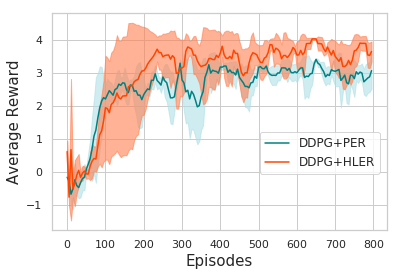

In [17]:
#avg_data = average_data(avg_data, 5)
#print(data)
#print(avg_data)


sns.set(style="whitegrid")
plt.plot(eps, data_mean_per, color="teal", label="DDPG+PER")
plt.rcParams['font.family'] = 'cursive'
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.fill_between(eps, upper_data_per, lower_data_per, color="powderblue", alpha=0.6)
plt.plot(eps, data_mean_her, color="orangered", label="DDPG+HLER")
plt.fill_between(eps, upper_data_her, lower_data_her, color="coral", alpha=0.6)
plt.xlabel("Episodes", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
plt.legend()
plt.legend(loc='upper center',bbox_to_anchor=(0.80, 0.480), fontsize=12)
#reward_plot = sns.lineplot(data=avg_data, x="Episode", y="Average Reward")

In [77]:
plt.savefig('/home/sub/catkin_ws/src/Turtlebot3_Pheromone/src/log/figures/reward_exp2.png', dpi=300)

<Figure size 432x288 with 0 Axes>